## DMA Final Project: Predicting Student Grades in Higher Education

Feature importance scores
PCA
stats/describe
mutual info scores 
control for outliers that are pushing the '1' grade value up 

target features : sports, scholarship type, parent occupation , prev semster's gpa, number of sibslings, sex , total salary, 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('higher_ed_grades.csv')

Features/Label:

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
2- Sex (1: female, 2: male)
3- Graduated high-school type: (1: private, 2: state, 3: other)
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5- Additional work: (1: Yes, 2: No)
6- Regular artistic or sports activity: (1: Yes, 2: No)
7- Do you have a partner: (1: Yes, 2: No)
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22- Attendance to classes (1: always, 2: sometimes, 3: never)
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
26- Listening in classes: (1: never, 2: sometimes, 3: always)
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31- Course ID
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [3]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [4]:
df.shape

(145, 33)

### EDA

<AxesSubplot: xlabel='29', ylabel='count'>

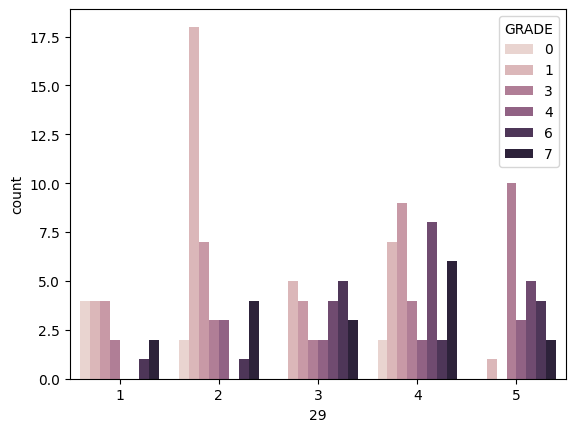

In [5]:
sns.countplot(data=df, x='29', hue='GRADE')

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_87/1289592008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='4', palette='pastel')


Text(0.5, 1.0, 'Distribution of Scholarship Types')

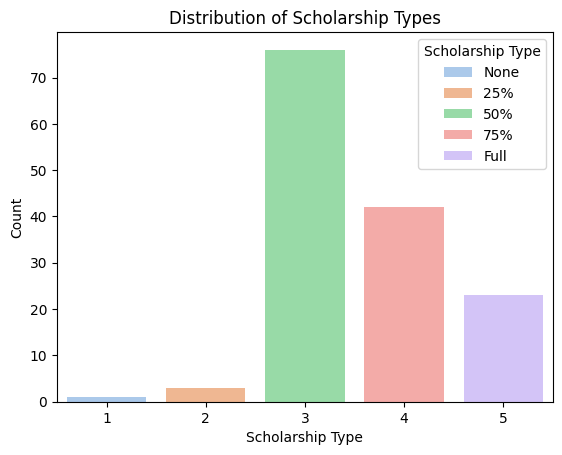

In [7]:
sns.countplot(data=df, x='4', palette='pastel')
legend_labels = ['None', '25%', '50%', '75%', 'Full']  
plt.legend(legend_labels, title='Scholarship Type', loc='upper right')
plt.xlabel('Scholarship Type')
plt.ylabel('Count')
plt.title('Distribution of Scholarship Types')

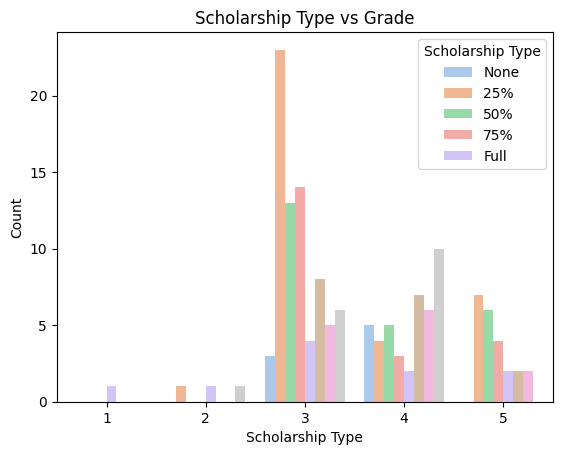

In [8]:
sns.countplot(data=df, x='4', hue='GRADE', palette='pastel')
legend_labels = ['None', '25%', '50%', '75%', 'Full']  
plt.legend(legend_labels, title='Scholarship Type', loc='upper right')
plt.xlabel('Scholarship Type')
plt.ylabel('Count')
plt.title('Scholarship Type vs Grade')
plt.show()

/tmp/ipykernel_87/3492805662.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='17', y='GRADE', palette='muted')


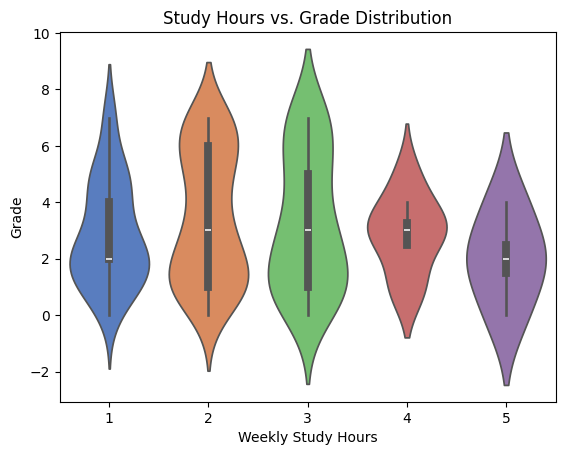

In [9]:
sns.violinplot(data=df, x='17', y='GRADE', palette='muted')
plt.title('Study Hours vs. Grade Distribution')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Grade')
plt.show()

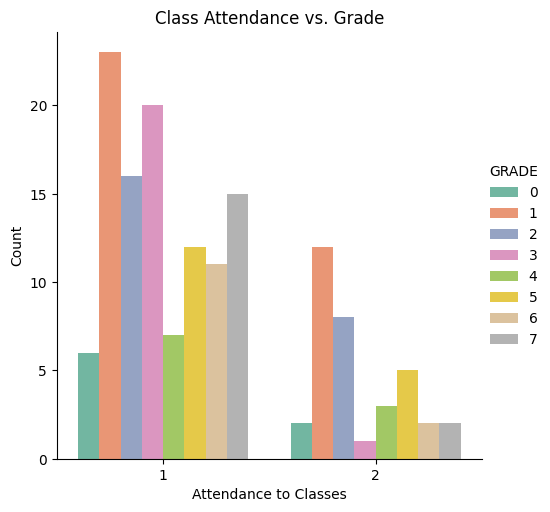

In [10]:
sns.catplot(data=df, x='22', hue='GRADE', kind='count', palette='Set2')
plt.title('Class Attendance vs. Grade')
plt.xlabel('Attendance to Classes')
plt.ylabel('Count')
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axi

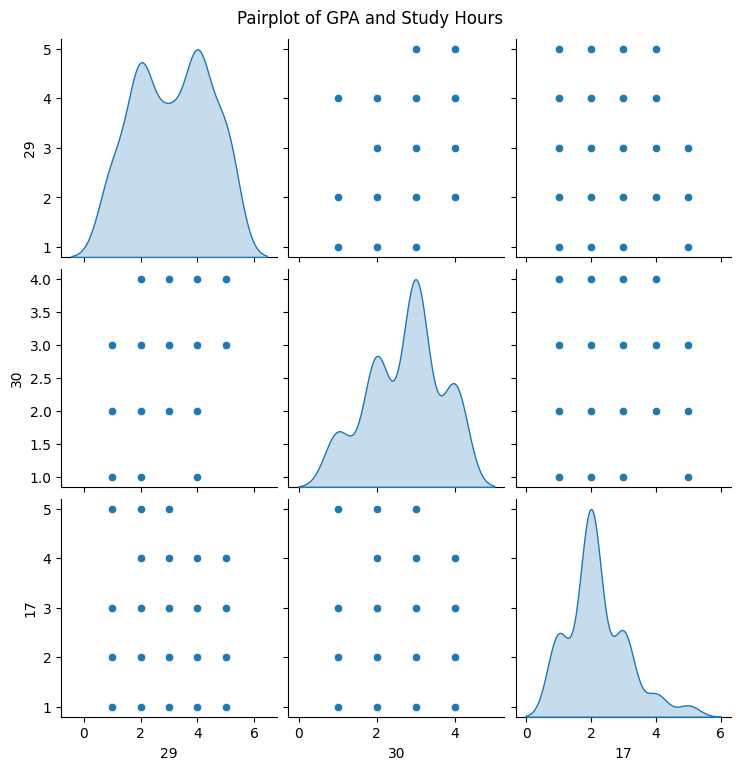

In [11]:
sns.pairplot(df[['29', 
                 '30', 
                 '17']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of GPA and Study Hours', y=1.02)
plt.show()

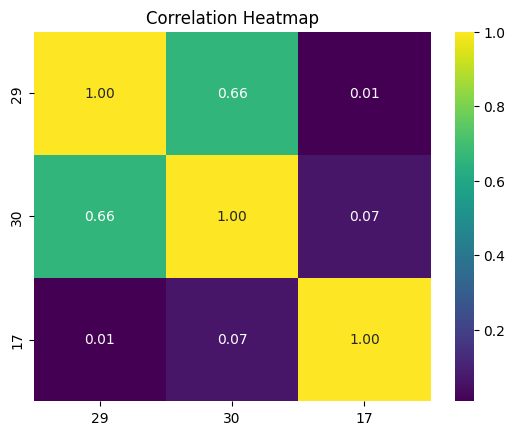

In [12]:
numerical_cols = ['29', 
                  '30',
                  '17']

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_87/871646447.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='15', y='GRADE', hue='16', ci=None, palette='pastel')


Text(0.5, 1.0, 'Parental Status vs. Grade')

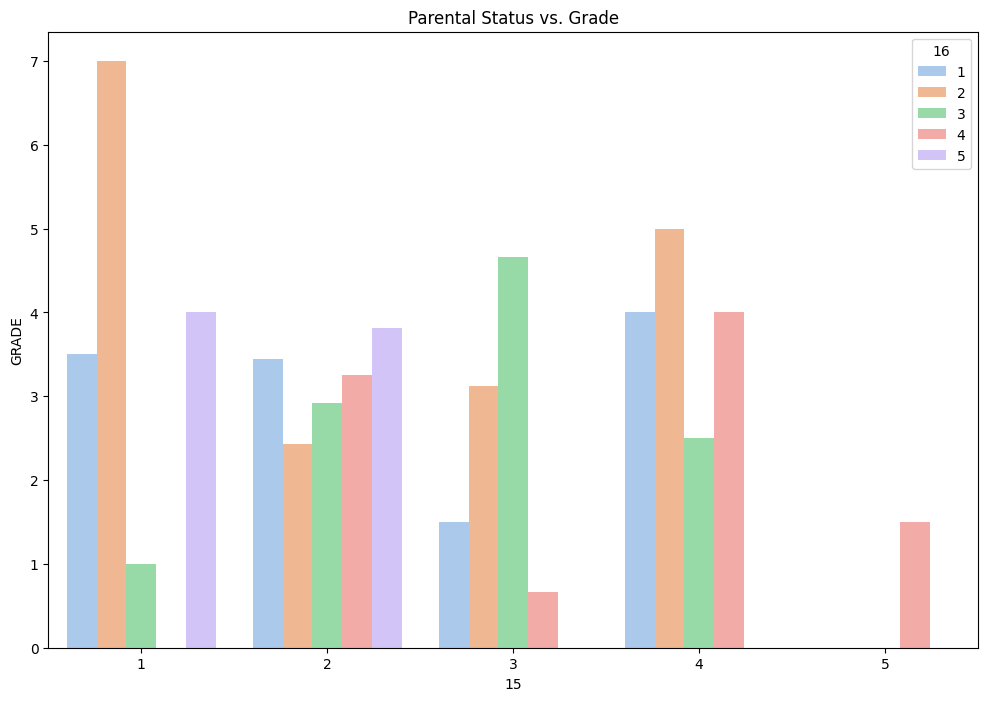

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='15', y='GRADE', hue='16', ci=None, palette='pastel')
plt.title('Parental Status vs. Grade')


/tmp/ipykernel_87/2459086594.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='5', y='GRADE', hue='6', ci=None, palette='pastel')


<AxesSubplot: xlabel='5', ylabel='GRADE'>

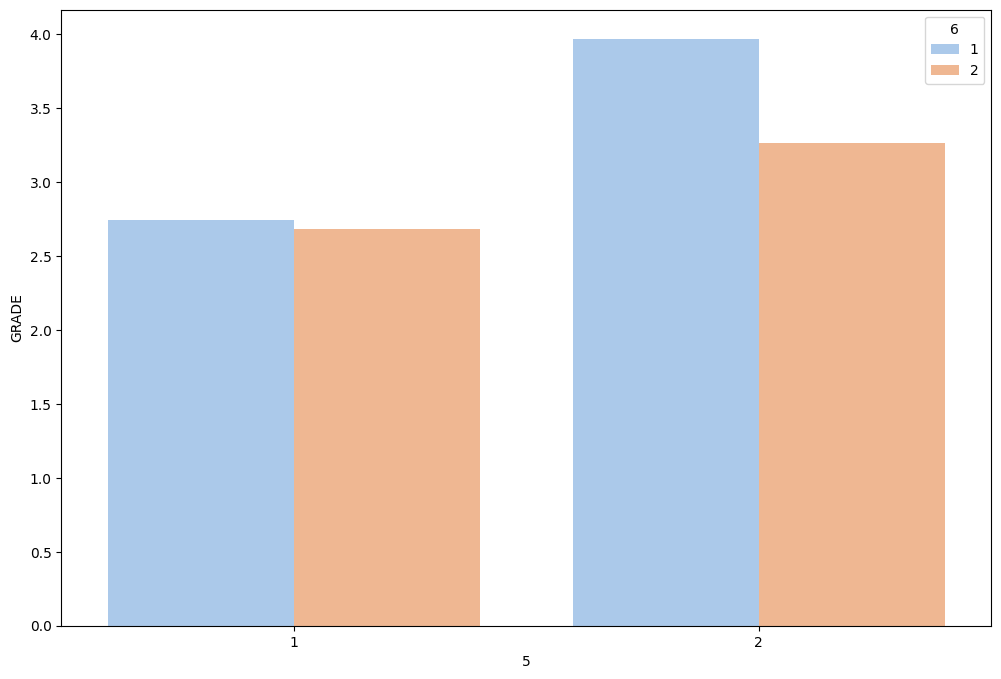

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='5', y='GRADE', hue='6', ci=None, palette='pastel')

/tmp/ipykernel_87/2187779378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grp, x='GRADE', y='Count', hue='6', ci=None, palette='pastel')


<AxesSubplot: xlabel='GRADE', ylabel='Count'>

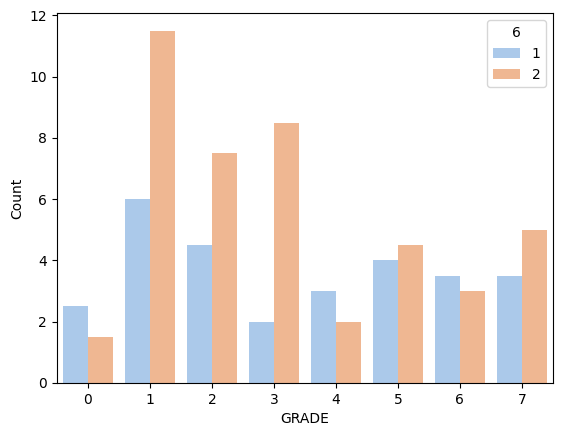

In [16]:
grp = df.groupby(['GRADE', '6', '7']).size().reset_index(name= 'Count')
sns.barplot(data=grp, x='GRADE', y='Count', hue='6', ci=None, palette='pastel')

/tmp/ipykernel_87/3787735739.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='6', y='GRADE', ci=None, palette='pastel')
/tmp/ipykernel_87/3787735739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='6', y='GRADE', ci=None, palette='pastel')


<AxesSubplot: xlabel='6', ylabel='GRADE'>

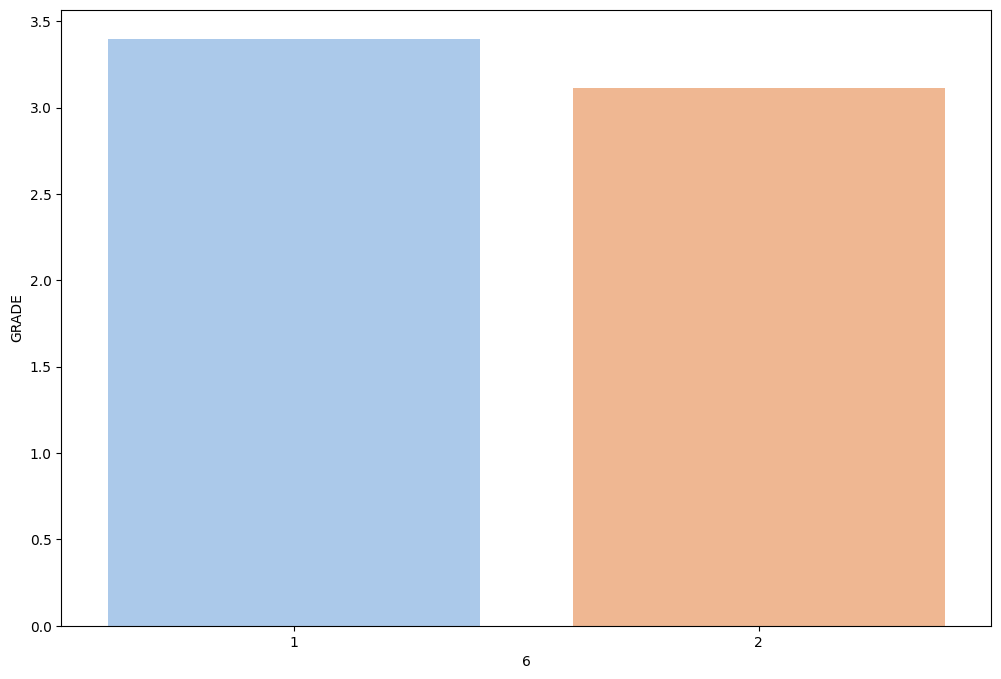

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='6', y='GRADE', ci=None, palette='pastel')

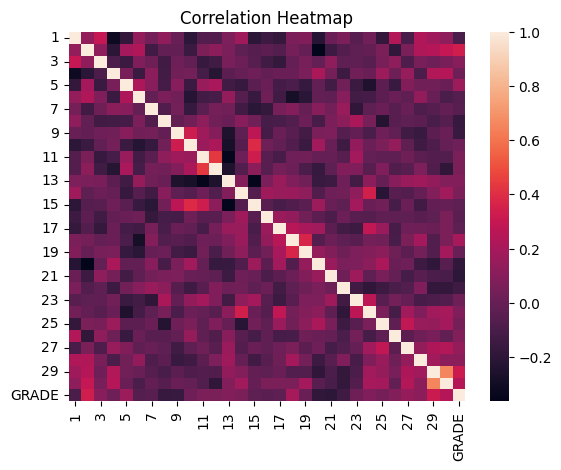

In [18]:
numerical_cols = ['1','2','3','4','5',
                  '6','7','8','9','10',
                  '11','12','13','14','15',
                  '16','17','18','19','20',
                  '21','22','23','24','25',
                  '26','27','28','29','30', 'GRADE']

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# logistic regression with whole batch of selected features to get a baseline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

features = ['2', '4', '6', '8',  '13', '29']
X = df[features]
y = df['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

In [21]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# different featyres cuz I was trying to finetune 
features = ['2', '4', '6', '8', '13', '29']
X = df[features]
y = df['GRADE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
jj = DecisionTreeClassifier(random_state=42)
jj.fit(X_train, y_train)
y_pred = jj.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

#with first feature set I got that 22.7% of accuracy in predicting student grds. 


0.22727272727272727

In [22]:
#Tuning 
from sklearn.model_selection import GridSearchCV

#I used this website to help me because I was rleying on our lab for decision trees and I did a bad job of tuning there lol
#https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/

#learned about grid search from this article: https://www.run.ai/guides/hyperparameter-tuning#:~:text=An%20example%20of%20hyperparameter%20tuning,possible%20combinations%20of%20these%20values.

grid_definition = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}
grid_searcher = GridSearchCV(DecisionTreeClassifier(), grid_definition, cv=10, scoring='accuracy')

grid_searcher.fit(X_train, y_train)
top = grid_searcher.best_params_
score = grid_searcher.best_score_
top, score

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


({'criterion': 'gini',
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.3254545454545455)

In [23]:
#Cross Valdiation 

from sklearn.model_selection import cross_val_score

val_score = cross_val_score(jj, X, y, cv=10, scoring='accuracy')
val_mean = val_score.mean()
val_std = val_score.std()
val_mean, val_std

#the cross validaiton score sgnifies that the model is not overfitting

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


(0.2119047619047619, 0.11482511596439096)

In [24]:
!pip install pydotplus==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=eb7295fa5829e2cc67580a95ddf0ec4c8a0880cbc09ba90e4efc68efefd10b65
  Stored in directory: /root/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
!pip install pydot==3.0.3


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


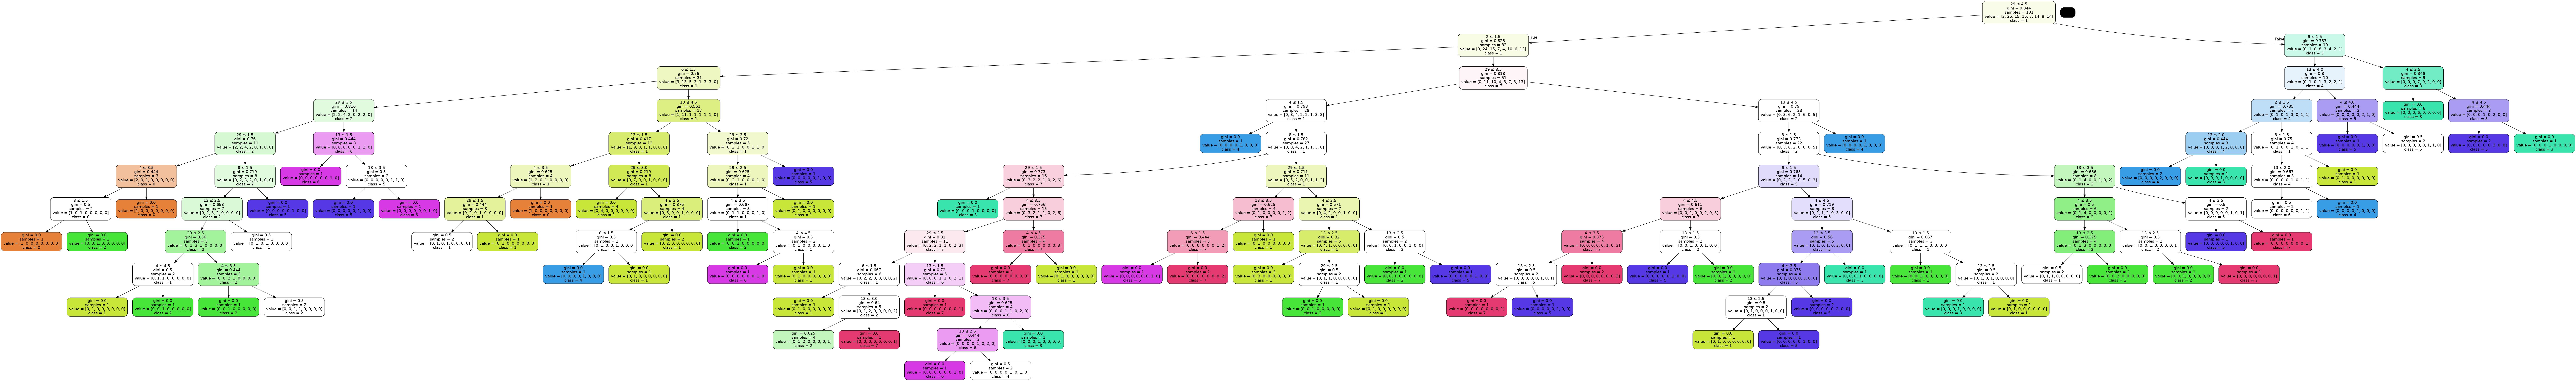

In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import pydot
from six import StringIO 


dotfile = StringIO()
export_graphviz(jj, out_file=dotfile,
                feature_names=features,
                class_names=[str(cls) for cls in sorted(y.unique() )], #I used gemini to help me with this line 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

In [29]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 25.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [31]:
#source: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#SMOTE FOR OVERSAMPLING FOR BIAS ISSUE
from imblearn.over_sampling import SMOTE
features = ['2', '4', '6', '8', '13', '29']
X = df[features]
y = df['GRADE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

jj = DecisionTreeClassifier(random_state=42)
jj.fit(X_train_resampled, y_train_resampled)

y_pred = jj.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.1590909090909091


In [33]:
#Neural Network Attempt 

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report 

features = ['2', '4', '6', '8', '13', '29']
X = df[features]
y = df['GRADE']

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', alpha=.001, batch_size=32, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"test accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))


test accuracy: 18.18%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.30      0.21        10
           2       0.22      0.22      0.22         9
           3       0.40      0.33      0.36         6
           4       0.00      0.00      0.00         3
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3

    accuracy                           0.18        44
   macro avg       0.12      0.15      0.13        44
weighted avg       0.15      0.18      0.16        44

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [45]:
#Deep Learning Model

from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.optimizers import Adam 

model = Sequential([Dense(95, activation='relu', input_shape=(X_train.shape[1],)), Dropout(.2), Dense(45, activation='relu'), Dense(len(np.unique(y)), activation='softmax')])
model.compile(optimizer=Adam(learning_rate=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=.2, verbose=2)

Epoch 1/50
3/3 - 1s - loss: 2.6126 - accuracy: 0.0750 - val_loss: 2.3319 - val_accuracy: 0.1429 - 575ms/epoch - 192ms/step
Epoch 2/50
3/3 - 0s - loss: 2.2556 - accuracy: 0.0875 - val_loss: 2.2323 - val_accuracy: 0.1429 - 31ms/epoch - 10ms/step
Epoch 3/50
3/3 - 0s - loss: 2.1002 - accuracy: 0.2000 - val_loss: 2.2127 - val_accuracy: 0.1429 - 40ms/epoch - 13ms/step
Epoch 4/50
3/3 - 0s - loss: 2.0206 - accuracy: 0.1875 - val_loss: 2.2289 - val_accuracy: 0.1429 - 25ms/epoch - 8ms/step
Epoch 5/50
3/3 - 0s - loss: 2.0273 - accuracy: 0.2625 - val_loss: 2.2659 - val_accuracy: 0.1429 - 22ms/epoch - 7ms/step
Epoch 6/50
3/3 - 0s - loss: 1.9667 - accuracy: 0.2125 - val_loss: 2.2921 - val_accuracy: 0.0476 - 60ms/epoch - 20ms/step
Epoch 7/50
3/3 - 0s - loss: 1.9566 - accuracy: 0.2500 - val_loss: 2.2939 - val_accuracy: 0.0476 - 23ms/epoch - 8ms/step
Epoch 8/50
3/3 - 0s - loss: 2.0186 - accuracy: 0.2125 - val_loss: 2.2834 - val_accuracy: 0.0476 - 23ms/epoch - 8ms/step
Epoch 9/50
3/3 - 0s - loss: 1.9897

In [28]:
#Failed Attempt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import Adam 

model = Sequential([Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
        Dropout(.3), Dense(64, activation='relu'), Dropout(.3), Dense(32, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')])
model.compile(optimizer=Adam(learning_rate=.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=.2, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 2.2112 - accuracy: 0.0750 - val_loss: 2.2185 - val_accuracy: 0.0952 - 639ms/epoch - 213ms/step
Epoch 2/100
3/3 - 0s - loss: 2.2019 - accuracy: 0.1375 - val_loss: 2.2047 - val_accuracy: 0.0952 - 27ms/epoch - 9ms/step
Epoch 3/100
3/3 - 0s - loss: 2.1776 - accuracy: 0.1625 - val_loss: 2.1980 - val_accuracy: 0.1429 - 71ms/epoch - 24ms/step
Epoch 4/100
3/3 - 0s - loss: 2.1695 - accuracy: 0.1375 - val_loss: 2.1906 - val_accuracy: 0.1429 - 28ms/epoch - 9ms/step
Epoch 5/100
3/3 - 0s - loss: 2.1256 - accuracy: 0.1375 - val_loss: 2.1855 - val_accuracy: 0.0476 - 42ms/epoch - 14ms/step
Epoch 6/100
3/3 - 0s - loss: 2.0618 - accuracy: 0.2375 - val_loss: 2.1838 - val_accuracy: 0.0476 - 50ms/epoch - 17ms/step
Epoch 7/100
3/3 - 0s - loss: 2.0404 - accuracy: 0.2375 - val_loss: 2.1819 - val_accuracy: 0.0476 - 38ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 2.0456 - accuracy: 0.2000 - val_loss: 2.1818 - val_accuracy: 0.0476 - 36ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s - l

In [47]:
!pip uninstall keras keras-tf tensorflow scikeras -y
!pip install tensorflow scikeras


Found existing installation: keras 2.10.0
Not uninstalling keras at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
Can't uninstall 'keras'. No files were found to uninstall.
Found existing installation: tensorflow 2.10.0
Not uninstalling tensorflow at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
Can't uninstall 'tensorflow'. No files were found to uninstall.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [48]:
#Hyperparamter Tuning 
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.regularizers import l2 
selected_features = ['COURSE ID', '29', '11', '12', '16']
X = df[selected_features]
y = df['GRADE']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def build_model(learning_rate=.001, dropout_rate=.3, regularization=.01): 
    model = Sequential([Dense(90, activation='relu', kernel_regularizer=l2(.01),input_shape=(X_train.shape[1],)), 
        Dropout(dropout_rate), Dense(45, activation='relu', kernel_regularizer=l2(.01)), Dropout(dropout_rate), Dense(32, activation='relu', kernel_regularizer=l2(.01)),
        Dense(len(np.unique(y_train)), activation='softmax')])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model 

model = KerasClassifier(build_fn=build_model, verbose=0)
param_grid = {'model__learning_rate': [.001, .0005], 'model__dropout_rate': [.3,.4], 'model__regularization':[.01,.001], 'batch_size':[16,32], 'epochs': [50,100]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =3, verbose=2)
grid_res = grid.fit(X_train, y_train)

print(f"Best Parameters: {grid_res.best_params_}")
print(f"Best Accuracy: {grid_res.best_score_ * 100:.2f}%")

best_model = grid_res.best_estimator_
test_acc = best_model.score(X_test, y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
/root/venv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.001, model__regularization=0.01; total time=   1.7s
/root/venv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
[CV] END batch_size=16, epochs=50, model__dropout_rate=0.3, model__learning_rate=0.001, model__regularization=0.01; total time=   1.6s
/root/venv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

In [49]:
test_acc = best_model.score(X_test, y_test)
print(test_acc)

0.2727272727272727


In [32]:
#K-Nearest-Neighbors Model 
from sklearn.neighbors import KNeighborsClassifier
features = ['2', '4', '6', '8', '13', '24', '29']
X = df[features]
y = df['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = .5, random_state = 42)
best_acc = -1
best_k = -1
for k in range(2, 21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    acc = accuracy_score(y_pred, y_valid)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(best_acc, best_k)
knn = KNeighborsClassifier(best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.36363636363636365 17
0.4090909090909091


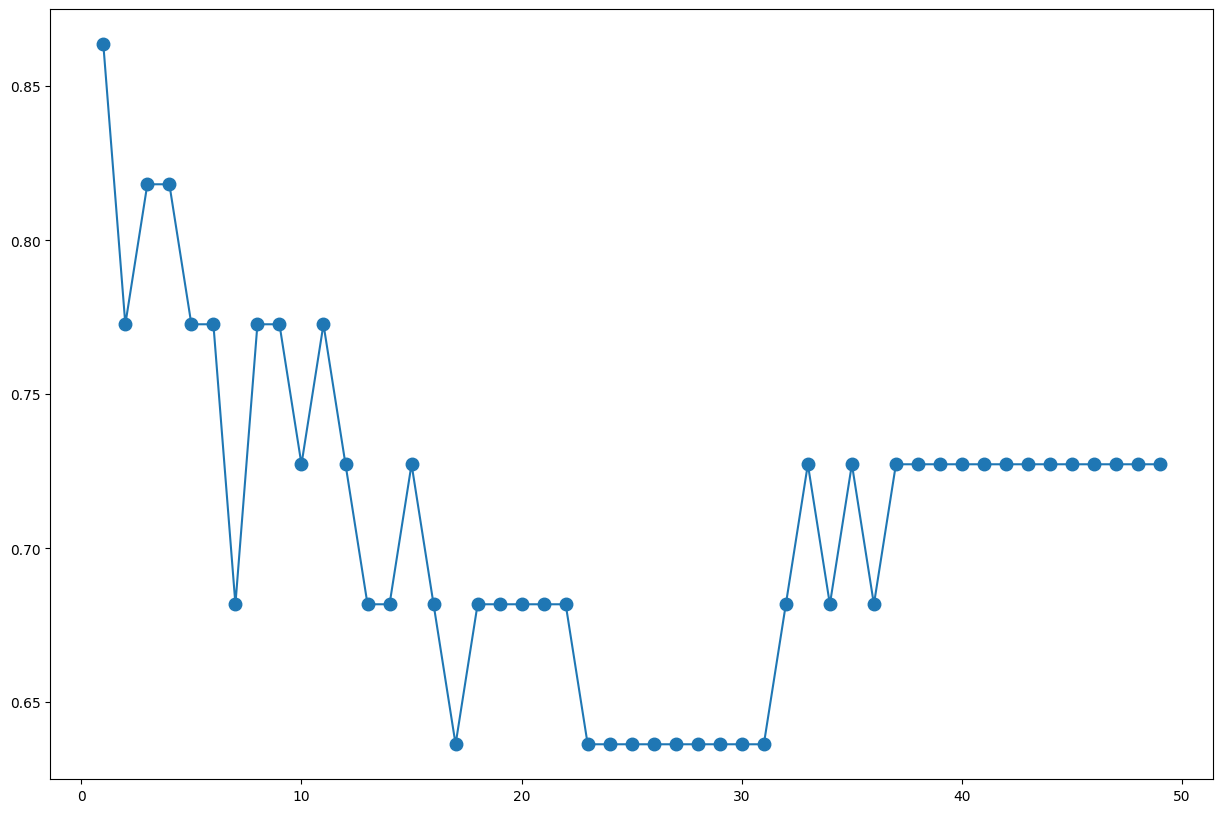

In [33]:
# from https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm
error_rate = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    error_rate.append(np.mean(pred != y_valid))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [34]:

from sklearn.feature_selection import RFE
x = df.iloc[:, 17:].drop(['COURSE ID', "GRADE"], axis=1) #education-related variables
y = df['GRADE']

est = LogisticRegression(max_iter=1000)

top_n_feats = []
for i in range(10):
    select = RFE(est, n_features_to_select=i+1) #top n amount of features
    select = select.fit(x, y)
    select_features = select.support_
    top_n_feats += [np.arange(17, 31)[select_features]] #the top n features as their numbers in the df

## RANKING
#top 1: 21
#top 2: 22
#top 3: 18
#top 4: 29
#top 5: 25
#top 6: 23
#top 7: 19
#top 8: 20
#top 9: 27
#top 10: 24

print(top_n_feats[5])

[18 21 22 23 25 29]


In [35]:
#KNN With Education Variables
from sklearn.neighbors import KNeighborsClassifier
features = top_n_feats[4]
X = df.iloc[:, features]
y = df['GRADE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = .5, random_state = 42)
best_acc = -1
best_k = -1
for k in range(2, 21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    acc = accuracy_score(y_pred, y_valid)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(best_acc, best_k)
knn = KNeighborsClassifier(best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.3181818181818182 4
0.2727272727272727


In [36]:
#Neural Network 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#feat = ['2', '4', '5', '6', '8', '13', '18', '29']
#x = df.drop(['GRADE', 'STUDENT ID'], axis=1)
#x = df[feat]

x = df.iloc[:, top_n_feats[4]] # use i to get i+1 features
y = df['GRADE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_train = to_categorical(y_train, num_classes = 8) #encoding
y_test = to_categorical(y_test, num_classes = 8)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

accuracies = []
for i in range(20): #trying to see the spread of the test accuracy on this model
    m = Sequential([
        Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)), 
        Dense(32, activation = 'relu'),
        #Dropout(0.1),  
        #Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        #Dense(4, activation = 'relu'),
        Dense(8, activation = 'softmax')
    ])
    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    m.fit(x_train, y_train, epochs = 13, batch_size = 1, validation_split=0.4)
    eval = m.evaluate(x_test, y_test)
    accuracies += [eval[1]]
    print("Trial ", i, ": ", eval)
print(np.mean(accuracies), np.std(accuracies))

Epoch 1/13
60/60 [==============================] - 1s 7ms/step - loss: 2.1190 - accuracy: 0.0833 - val_loss: 2.0889 - val_accuracy: 0.0488
Epoch 2/13
60/60 [==============================] - 0s 6ms/step - loss: 2.0403 - accuracy: 0.1833 - val_loss: 2.0801 - val_accuracy: 0.1463
Epoch 3/13
60/60 [==============================] - 0s 4ms/step - loss: 2.0063 - accuracy: 0.1667 - val_loss: 2.0752 - val_accuracy: 0.1220
Epoch 4/13
60/60 [==============================] - 0s 4ms/step - loss: 1.9728 - accuracy: 0.2167 - val_loss: 2.0809 - val_accuracy: 0.1463
Epoch 5/13
60/60 [==============================] - 0s 4ms/step - loss: 1.9285 - accuracy: 0.2500 - val_loss: 2.1095 - val_accuracy: 0.1463
Epoch 6/13
60/60 [==============================] - 0s 4ms/step - loss: 1.8805 - accuracy: 0.2333 - val_loss: 2.1298 - val_accuracy: 0.1463
Epoch 7/13
60/60 [==============================] - 0s 4ms/step - loss: 1.8432 - accuracy: 0.2500 - val_loss: 2.1724 - val_accuracy: 0.1707
Epoch 8/13
60/60 [==

In [37]:
# Baseline accuracy for ALL education variables
x = df.iloc[:, top_n_feats[3]] 
y = df['GRADE']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.29545454545454547

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=259e052d-d45f-4944-9710-81e425069be3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>